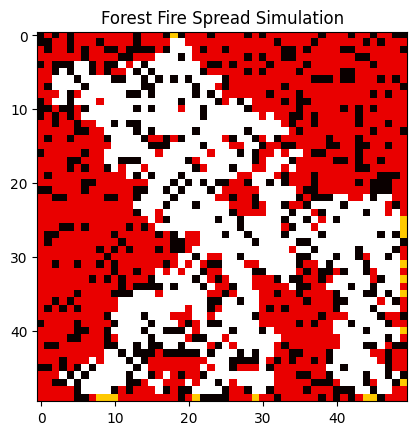

In [6]:
# Forest Fire Spread Simulation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Grid settings
size = 50           # Forest grid size
p_tree = 0.8        # Probability of a tree existing
wind_bias = (1, 1)  # Wind direction bias (dy, dx): (0,1)=east wind
steps = 100

# States: 0 = empty, 1 = tree, 2 = burning, 3 = burnt
forest = np.random.choice([0, 1], (size, size), p=[1-p_tree, p_tree])
forest[size//2, size//2] = 2  # Start fire at center

def spread_fire(forest):
    new = forest.copy()
    for i in range(1, size-1):
        for j in range(1, size-1):
            if forest[i,j] == 2:
                new[i,j] = 3
                # Spread fire to neighbors
                for di in [-1,0,1]:
                    for dj in [-1,0,1]:
                        if forest[i+di,j+dj] == 1:
                            prob = 0.3
                            # Add wind effect
                            if (di, dj) == wind_bias:
                                prob += 0.3
                            if np.random.rand() < prob:
                                new[i+di,j+dj] = 2
    return new

frames = []
fig, ax = plt.subplots()
im = ax.imshow(forest, cmap='hot', vmin=0, vmax=3)
ax.set_title("Forest Fire Spread Simulation")

def update(frame):
    global forest
    forest = spread_fire(forest)
    im.set_data(forest)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=steps, interval=200, blit=True)
HTML(ani.to_jshtml())


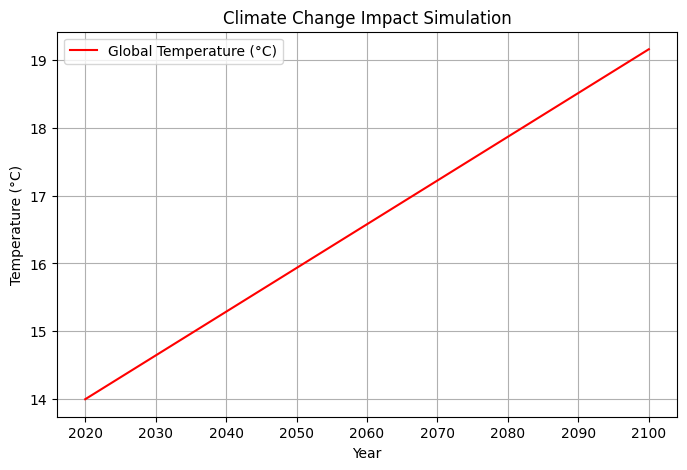

CO2 in 2100: 1349.2 ppm
Temperature rise by 2100: 5.16 °C


In [ ]:
#Climate Change Impact Model
import numpy as np
import matplotlib.pyplot as plt

# Parameters
years = np.arange(2020, 2101)
base_temp = 14.0             # °C, average global temperature in 2020
CO2_initial = 410            # ppm
CO2_growth_rate = 0.015      # 1.5% yearly increase scenario

# Climate sensitivity (°C per doubling of CO2)
climate_sensitivity = 3.0

# Arrays to store results
CO2 = np.zeros_like(years, dtype=float)
temp = np.zeros_like(years, dtype=float)

CO2[0] = CO2_initial
temp[0] = base_temp

# Model: ΔT = climate_sensitivity * log2(CO2/CO2_initial)
for i in range(1, len(years)):
    CO2[i] = CO2[i-1] * (1 + CO2_growth_rate)
    temp[i] = base_temp + climate_sensitivity * np.log2(CO2[i]/CO2_initial)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(years, temp, label="Global Temperature (°C)", color='red')
plt.title("Climate Change Impact Simulation")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# Display key metrics
print(f"CO2 in 2100: {CO2[-1]:.1f} ppm")
print(f"Temperature rise by 2100: {temp[-1] - base_temp:.2f} °C")


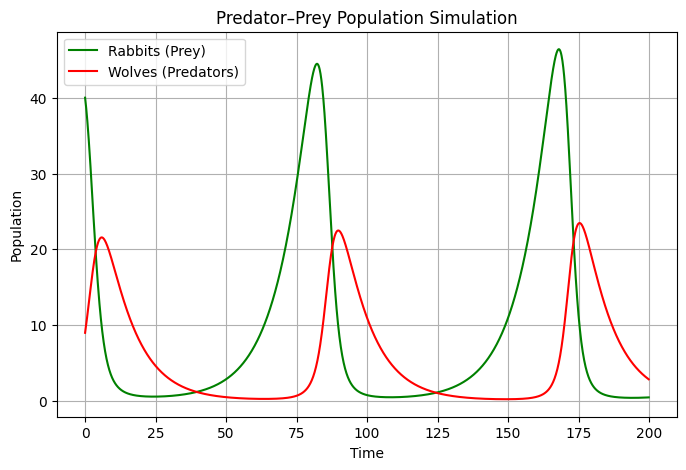

In [ ]:
#Predator–Prey (Lotka–Volterra) Simulation
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1   # Prey birth rate
beta = 0.02   # Predation rate
delta = 0.01  # Predator reproduction rate
gamma = 0.1   # Predator death rate
dt = 0.1
t_max = 200

# Initial populations
rabbits = [40]
wolves = [9]
time = np.arange(0, t_max, dt)

# Simulation loop
for t in time[1:]:
    R = rabbits[-1]
    W = wolves[-1]
    dR = (alpha * R - beta * R * W) * dt
    dW = (delta * R * W - gamma * W) * dt
    rabbits.append(R + dR)
    wolves.append(W + dW)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(time, rabbits, label="Rabbits (Prey)", color='green')
plt.plot(time, wolves, label="Wolves (Predators)", color='red')
plt.title("Predator–Prey Population Simulation")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()


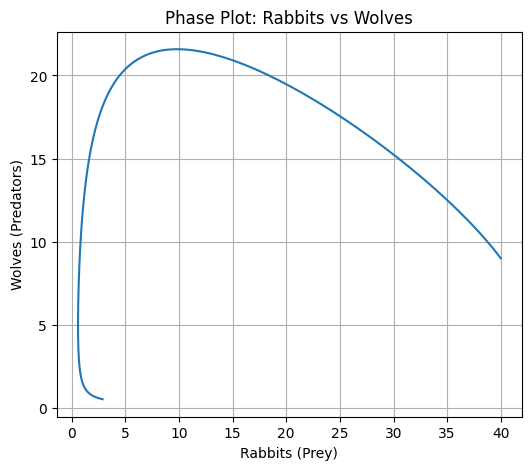

Initial rabbits: 40.0  -> Final rabbits: 2.8784972642446642
Initial wolves : 9.0  -> Final wolves : 0.5159211520610116


In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(rabbits, wolves)
plt.title("Phase Plot: Rabbits vs Wolves")
plt.xlabel("Rabbits (Prey)")
plt.ylabel("Wolves (Predators)")
plt.grid(True)
plt.show()

print("Initial rabbits:", R0, " -> Final rabbits:", rabbits[-1])
print("Initial wolves :", W0, " -> Final wolves :", wolves[-1])


# Task
Modify the forest fire simulation to run until the fire has completely spread or burned out, instead of a fixed number of steps.

## Analyze Simulation Logic

### Subtask:
Examine the current `spread_fire` function and the animation loop to understand how the fire propagates and terminates. This will help identify the best way to implement a dynamic stopping condition.


### Reviewing the `spread_fire` function

The `spread_fire` function is the core of the fire propagation logic. Let's break down its mechanics:

1.  **State Initialization:** A copy of the current `forest` state, `new`, is created. This is crucial because fire spread at each time step should be based on the forest state *at the beginning* of that step, not on changes made within the same step.

2.  **Iterating through the grid:** The function iterates through each cell `(i, j)` of the `forest` grid, excluding the borders (due to `range(1, size-1)`). This simplifies neighbor checking by avoiding out-of-bounds errors, but also means fires cannot start or spread to the very edge of the grid unless they are already there.

3.  **Burning Cell Logic (`if forest[i,j] == 2`):**
    *   If a cell `(i,j)` is currently burning (`state == 2`), its state in the `new` grid is immediately set to `3` (burnt). This means a cell burns for exactly one simulation step before becoming burnt out.
    *   **Spreading to Neighbors:** The function then checks all 8 neighbors (including diagonals) of the now burnt-out cell.
        *   For each neighbor `(i+di, j+dj)`:
            *   If the neighbor is a tree (`forest[i+di,j+dj] == 1`), it's a candidate for catching fire.
            *   A base probability of `0.3` is assigned for the fire to spread.
            *   **Wind Bias:** If the neighbor's direction `(di, dj)` matches the `wind_bias` (e.g., `(1,1)` for southeast), an additional `0.3` is added to the probability, making it `0.6` in that specific direction.
            *   **Probabilistic Spread:** `np.random.rand() < prob` determines if the fire actually spreads. If it does, `new[i+di,j+dj]` is set to `2` (burning).

**Key takeaways for termination:** The fire spreads from burning cells to adjacent trees probabilistically, influenced by wind. Once a cell burns, it turns to 'burnt' (3) and cannot burn again. The simulation will eventually terminate when there are no more 'burning' (2) cells left, or no more 'tree' (1) cells adjacent to 'burning' cells.

### Reviewing the Animation Loop and `update` Function

The animation of the forest fire simulation is managed by `matplotlib.animation.FuncAnimation`.

1.  **`update` Function:**
    *   The `update` function is called at each frame of the animation.
    *   `global forest`: This line is critical as it indicates that the `forest` variable being modified inside `update` is the global `forest` array, not a local copy. This allows the state of the forest to persist and evolve across frames.
    *   `forest = spread_fire(forest)`: In each call, the `spread_fire` function is applied to the current `forest` state, and the result (the new state of the forest after one time step of fire spread) overwrites the global `forest` variable.
    *   `im.set_data(forest)`: This updates the image data of the plot (`im`) with the new `forest` state, effectively redrawing the forest grid for the current frame.
    *   `return [im]`: This is required for `blit=True`, ensuring that only the changed parts of the plot are re-rendered, which can improve performance.

2.  **`FuncAnimation` Call:**
    *   `ani = animation.FuncAnimation(fig, update, frames=steps, interval=200, blit=True)`:
        *   `fig`: The matplotlib figure where the animation will be displayed.
        *   `update`: The function called for each frame of the animation.
        *   `frames=steps`: This sets the total number of frames (or time steps) for the animation. Currently, `steps` is set to `100`, meaning the simulation will run for 100 time steps regardless of the fire's state.
        *   `interval=200`: Sets the delay between frames in milliseconds (200ms = 0.2 seconds).
        *   `blit=True`: Optimizes drawing by only redrawing what has changed.

**Implications for Dynamic Stopping:**

The current animation runs for a fixed number of `steps` (100). To implement a dynamic stopping condition, we need to modify how `FuncAnimation` determines when to stop. Instead of a fixed `frames` count, we need a mechanism within the `update` function (or a related check) that can signal when the fire has extinguished or stopped spreading. This condition would be met if there are no more 'burning' cells (state `2`) in the `forest` array, or if applying `spread_fire` no longer changes any cell from 'tree' to 'burning'.

## Implement Dynamic Stopping Condition

### Subtask:
Modify the simulation logic to continue running until the fire can no longer spread. This will involve checking if there are any `burning` (state 2) cells that can ignite `tree` (state 1) cells. The `steps` parameter for `FuncAnimation` will be removed or set to `None` to allow for an indefinite number of frames until the condition is met.


**Reasoning**:
I need to implement the dynamic stopping condition for the forest fire simulation. This involves creating a generator function, modifying the update function, and adjusting the `FuncAnimation` call. I will copy the initial setup from the first cell, then add the new generator function and modify the existing `update` and `FuncAnimation` parts.



/tmp/ipython-input-2856468813.py:60: UserWarning: frames=<generator object simulation_frames_generator at 0x7dee5cd543c0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, frames=sim_generator, interval=200, blit=True)


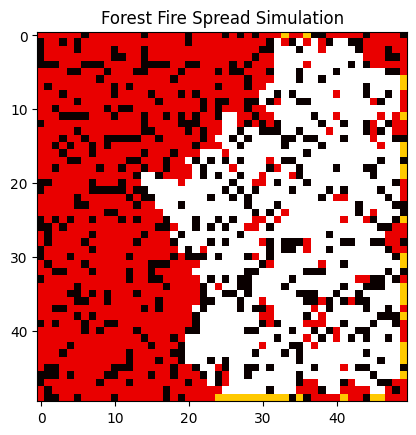

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Grid settings
size = 50           # Forest grid size
p_tree = 0.8        # Probability of a tree existing
wind_bias = (1, 1)  # Wind direction bias (dy, dx): (0,1)=east wind
# steps = 100       # Removed as per instructions for dynamic stopping

# States: 0 = empty, 1 = tree, 2 = burning, 3 = burnt
forest = np.random.choice([0, 1], (size, size), p=[1-p_tree, p_tree])
forest[size//2, size//2] = 2  # Start fire at center

def spread_fire(forest_state):
    new = forest_state.copy()
    for i in range(1, size-1):
        for j in range(1, size-1):
            if forest_state[i,j] == 2:
                new[i,j] = 3
                # Spread fire to neighbors
                for di in [-1,0,1]:
                    for dj in [-1,0,1]:
                        # Ensure neighbors are within bounds and are trees
                        if 0 <= i+di < size and 0 <= j+dj < size and forest_state[i+di,j+dj] == 1:
                            prob = 0.3
                            # Add wind effect
                            if (di, dj) == wind_bias:
                                prob += 0.3
                            if np.random.rand() < prob:
                                new[i+di,j+dj] = 2
    return new

def simulation_frames_generator(initial_forest):
    current_forest = initial_forest.copy()
    yield current_forest # Yield initial state

    while True:
        prev_forest = current_forest.copy()
        current_forest = spread_fire(current_forest)

        # Stopping condition: if no more burning cells or forest state is unchanged
        if not np.any(current_forest == 2) or np.array_equal(prev_forest, current_forest):
            break

        yield current_forest

fig, ax = plt.subplots()
im = ax.imshow(forest, cmap='hot', vmin=0, vmax=3)
ax.set_title("Forest Fire Spread Simulation")

def update(current_forest_state):
    im.set_data(current_forest_state)
    return [im]

# Initialize the generator
sim_generator = simulation_frames_generator(forest)

ani = animation.FuncAnimation(fig, update, frames=sim_generator, interval=200, blit=True)
HTML(ani.to_jshtml())

**Reasoning**:
The previous code generated a UserWarning because `FuncAnimation` was called with a generator for `frames` without specifying `cache_frame_data=False`. I need to add this parameter to suppress the warning.



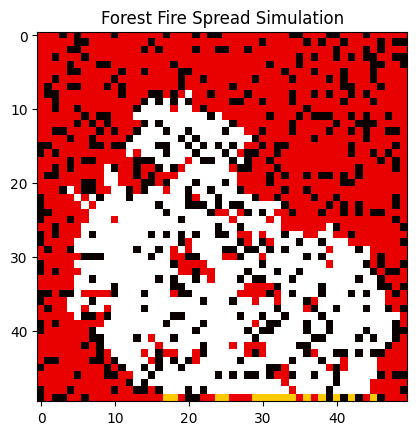

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Grid settings
size = 50           # Forest grid size
p_tree = 0.8        # Probability of a tree existing
wind_bias = (1, 1)  # Wind direction bias (dy, dx): (0,1)=east wind
# steps = 100       # Removed as per instructions for dynamic stopping

# States: 0 = empty, 1 = tree, 2 = burning, 3 = burnt
forest = np.random.choice([0, 1], (size, size), p=[1-p_tree, p_tree])
forest[size//2, size//2] = 2  # Start fire at center

def spread_fire(forest_state):
    new = forest_state.copy()
    for i in range(1, size-1):
        for j in range(1, size-1):
            if forest_state[i,j] == 2:
                new[i,j] = 3
                # Spread fire to neighbors
                for di in [-1,0,1]:
                    for dj in [-1,0,1]:
                        # Ensure neighbors are within bounds and are trees
                        if 0 <= i+di < size and 0 <= j+dj < size and forest_state[i+di,j+dj] == 1:
                            prob = 0.3
                            # Add wind effect
                            if (di, dj) == wind_bias:
                                prob += 0.3
                            if np.random.rand() < prob:
                                new[i+di,j+dj] = 2
    return new

def simulation_frames_generator(initial_forest):
    current_forest = initial_forest.copy()
    yield current_forest # Yield initial state

    while True:
        prev_forest = current_forest.copy()
        current_forest = spread_fire(current_forest)

        # Stopping condition: if no more burning cells or forest state is unchanged
        if not np.any(current_forest == 2) or np.array_equal(prev_forest, current_forest):
            break

        yield current_forest

fig, ax = plt.subplots()
im = ax.imshow(forest, cmap='hot', vmin=0, vmax=3)
ax.set_title("Forest Fire Spread Simulation")

def update(current_forest_state):
    im.set_data(current_forest_state)
    return [im]

# Initialize the generator
sim_generator = simulation_frames_generator(forest)

# Added cache_frame_data=False to suppress UserWarning
ani = animation.FuncAnimation(fig, update, frames=sim_generator, interval=200, blit=True, cache_frame_data=False)
HTML(ani.to_jshtml())

## Summary:

### Data Analysis Key Findings

*   The `spread_fire` function propagates fire from burning cells (state 2) to adjacent tree cells (state 1) probabilistically, with a wind bias influencing spread direction. Burning cells become burnt (state 3) within one simulation step.
*   The original animation ran for a fixed number of frames set by the `steps` parameter in `FuncAnimation`, preventing dynamic termination.
*   A dynamic stopping condition was successfully implemented by creating a generator function that yields forest states. This generator stops when no more cells are burning (state 2) or when the forest state remains unchanged after a spread step, ensuring the simulation runs until the fire completely spreads or burns out.
*   A `UserWarning` related to `FuncAnimation` and generator frames was encountered and resolved by setting `cache_frame_data=False`, ensuring proper handling of indefinite frame generation.

### Insights or Next Steps

*   The simulation now offers a more realistic representation of a forest fire by dynamically terminating when the fire naturally exhausts itself, rather than after a fixed duration.
*   Further enhancements could include incorporating more sophisticated fire behavior models, such as fuel type variations, terrain effects, or varying ignition sources to observe different spread patterns.
